In [1]:
#Lander Borbe

#importing libraries
#getting stocks data on yahoo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as web

from pandas_datareader.data import DataReader
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

sns.set_style('whitegrid')
plt.style.use("dark_background")
%matplotlib inline

In [2]:
#Grabbing data Puregold data on yahoo
pg_list = ['PGCMF']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in pg_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

In [3]:
company_list = [PGCMF]
company_name = ["Puregold Price Club, Inc."]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [4]:
df.tail(25)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-06 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-07 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-08 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-09 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-12 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-13 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-14 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-15 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."
2022-09-16 00:00:00-04:00,0.578,0.578,0.578,0.578,0.578,0,"Puregold Price Club, Inc."


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2020-10-12 00:00:00-04:00,0.98,0.98,0.98,0.98,0.956725,0,"Puregold Price Club, Inc."
2020-10-13 00:00:00-04:00,0.90,0.90,0.90,0.90,0.878625,100,"Puregold Price Club, Inc."
2020-10-14 00:00:00-04:00,0.97,0.97,0.97,0.97,0.946963,200,"Puregold Price Club, Inc."
2020-10-15 00:00:00-04:00,0.97,0.97,0.97,0.97,0.946963,0,"Puregold Price Club, Inc."
2020-10-16 00:00:00-04:00,0.97,0.97,0.97,0.97,0.946963,0,"Puregold Price Club, Inc."


In [6]:
#Check for NaN values

df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [7]:
PGCMF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.744662,0.744962,0.743869,0.744306,0.736223,4959.642147
std,0.119791,0.119922,0.119538,0.119752,0.113199,27670.863282
min,0.513000,0.513000,0.513000,0.513000,0.513000,0.000000
25%,0.673000,0.673000,0.673000,0.673000,0.673000,0.000000
50%,0.730000,0.730000,0.730000,0.730000,0.725000,0.000000
75%,0.805000,0.805000,0.805000,0.805000,0.793819,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.976250,300700.000000


In [8]:
PGCMF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-10-12 00:00:00-04:00 to 2022-10-10 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


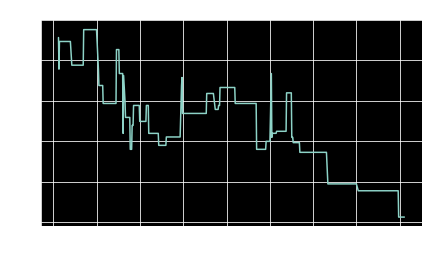

In [9]:
#2020 to 2022 data

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {pg_list[i - 1]}")

In [10]:
plt.show()

In [11]:
ma_day = [15, 30, 90]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


Text(0.5, 1.0, 'Puregold Price Club, Inc. ')

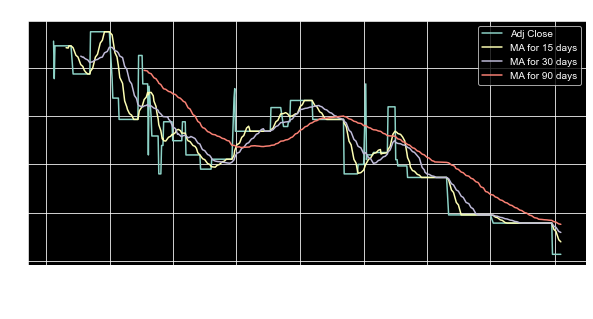

In [12]:
#Moving average

fig, axes = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

PGCMF[['Adj Close', 'MA for 15 days', 'MA for 30 days', 'MA for 90 days']].plot(ax=axes)
axes.set_title('Puregold Price Club, Inc. ')

In [13]:
#Get closing prices from the dataset from yahoo
closing_df = DataReader(pg_list, 'yahoo', start, end)['Adj Close']

In [14]:
closing_df.tail(25) 

Symbols,PGCMF
Date,
2022-09-06,0.578
2022-09-07,0.578
2022-09-08,0.578
2022-09-09,0.578
2022-09-12,0.578
2022-09-13,0.578
2022-09-14,0.578
2022-09-15,0.578
2022-09-16,0.578


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [15]:
#Tech return from df

tech_returns = closing_df.pct_change()
tech_returns.head()

Symbols,PGCMF
Date,
2020-10-12,NaN
2020-10-13,-0.081633
2020-10-14,0.077778
2020-10-15,0.000000
2020-10-16,0.000000


In [16]:
#Cleaning tech_returns

returns = tech_returns.dropna()

In [17]:
df = DataReader('PGCMF', data_source='yahoo', start='2020-10-10', end=datetime.now())

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-09,0.98,0.98,0.98,0.98,200.0,0.956725
2020-10-12,0.98,0.98,0.98,0.98,0.0,0.956725
2020-10-13,0.90,0.90,0.90,0.90,100.0,0.878625
2020-10-14,0.97,0.97,0.97,0.97,200.0,0.946963
2020-10-15,0.97,0.97,0.97,0.97,0.0,0.946963


In [18]:
#Split the close column

data = df.filter(['Close'])
dataset = data.values

#Getting 95 percent of rows for training

training_data_len = int(np.ceil( len(dataset) * .95 ))

In [19]:
training_data_len

479

In [20]:
#Data scalling

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.95893228],
       [0.95893228],
       [0.79466114],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.93839841],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [0.81519512],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [21]:
#Training data
train_data = scaled_data[0:int(training_data_len), :]

In [22]:
#Splitting values
x_train = []
y_train = []

for i in range(90, len(train_data)):
    x_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 91:
        print(x_train)
        print(y_train)
        print()

[array([0.95893228, 0.95893228, 0.79466114, 0.93839841, 0.93839841,
       0.93839841, 0.93839841, 0.93839841, 0.93839841, 0.93839841,
       0.93839841, 0.93839841, 0.93839841, 0.93839841, 0.93839841,
       0.93839841, 0.93839841, 0.93839841, 0.93839841, 0.93839841,
       0.93839841, 0.81519512, 0.81519512, 0.81519512, 0.81519512,
       0.81519512, 0.81519512, 0.81519512, 0.81519512, 0.81519512,
       0.81519512, 0.81519512, 0.81519512, 0.81519512, 0.81519512,
       0.81519512, 0.81519512, 0.81519512, 0.81519512, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.79466114, 0.69199183,
       0.69199183, 0.69199183, 0.69199183, 0.69199183, 0.69199183,
       0.69199183, 0.59958933, 0.59958933, 0.59958933, 0.59958933,
       0.59958933, 0.59958933, 0.59958933, 0.59958933, 0.5995

In [23]:
#Converting to arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshaping to avoid errors
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
#LSTM Model
model = Sequential()
model.add(LSTM(130, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(30))
model.add(Dense(9))

In [25]:
#Model Compiling
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Model Training
#Sana Accurate

model.fit(x_train, y_train, batch_size=15, epochs=50)

Epoch 1/50
26/26 [==============================] - 3s 97ms/step - loss: 0.0021
Epoch 2/50
26/26 [==============================] - 2s 93ms/step - loss: 0.0021
Epoch 3/50
26/26 [==============================] - 2s 93ms/step - loss: 0.0021
Epoch 4/50
26/26 [==============================] - 3s 99ms/step - loss: 0.0021
Epoch 5/50
26/26 [==============================] - 3s 123ms/step - loss: 0.0020
Epoch 6/50
26/26 [==============================] - 3s 129ms/step - loss: 0.0022
Epoch 7/50
26/26 [==============================] - 3s 125ms/step - loss: 0.0021
Epoch 8/50
26/26 [==============================] - 3s 107ms/step - loss: 0.0021
Epoch 9/50
26/26 [==============================] - 3s 97ms/step - loss: 0.0020
Epoch 10/50
26/26 [==============================] - 3s 103ms/step - loss: 0.0020
Epoch 11/50
26/26 [==============================] - 3s 116ms/step - loss: 0.0020
Epoch 12/50
26/26 [==============================] - 3s 108ms/step - loss: 0.0020
Epoch 13/50
26/26 [===========

In [34]:
#Making a testing dataset


test_data = scaled_data[training_data_len - 90: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(90, len(test_data)):
    x_test.append(test_data[i-90:i, 0])
    
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [35]:
#Model predicted price 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 64ms/step


In [36]:
#RMSE

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.0149088835099897

In [37]:
#Predicting values

puregold_quote = web.DataReader('PGCMF', data_source='yahoo', start='2020-10-10',end='2022-10-10')
new_df = puregold_quote.filter(['Close'])
last_90_days = new_df[-90:].values
last_90_days_scaled = scaler.transform(last_90_days)

#New df

dfp_test = []
dfp_test.append(last_90_days_scaled)
dfp_test = np.array(dfp_test)
dfp_test = np.reshape(dfp_test, (dfp_test.shape[0], dfp_test.shape[1], 1))


In [38]:
#PGCMF prediction from october 11, 2022 to october 19,2022 (Close)

predict_price = model.predict(dfp_test)
predict_price = scaler.inverse_transform(predict_price)
print(predict_price)

1/1 [==============================] - 0s 42ms/step
[[0.5116671  0.51309466 0.50923145 0.51323456 0.5111929  0.5107653
  0.5129055  0.5093741  0.5146515 ]]


In [39]:
#Sir, sinama kona po october 11 since as of now october 10 palang po latest sa yahoo finance